In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

In [2]:
data_dict=pd.read_excel('Election_Data.xlsx')

In [3]:
data_dict

,**Data Dictionary**
0,1. vote: Party choice: Conservative or Labour
1,2. age: in years
2,3. economic.cond.national: Assessment of curre...
3,4. economic.cond.household: Assessment of curr...
4,"5. Blair: Assessment of the Labour leader, 1 t..."
5,6. Hague: Assessment of the Conservative leade...
6,7. Europe: an 11-point scale that measures res...
7,8. political.knowledge: Knowledge of parties' ...
8,9. gender: female or male.


In [4]:
df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')

In [5]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [6]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [9]:
df.shape

(1525, 9)

In [10]:
df1=df.describe().T
df1['range']=df1['max']-df1['min']
df1['IQR']=df1['75%']-df1['25%']
df1['CV']=df1['std']/df1['mean']
df1['mode']=df.mode().T[0]
#df1['mode2']=df.mode().T[1]
#df1['mode3']=df.mode().T[2]
#df1['mode4']=df.mode().T[3]
round(df1.drop('count',axis=1).rename(columns = {'50%':'median'}),2)

,mean,std,min,25%,median,75%,max,range,IQR,CV,mode
age,54.18,15.71,24.0,41.0,53.0,67.0,93.0,69.0,26.0,0.29,37
economic.cond.national,3.25,0.88,1.0,3.0,3.0,4.0,5.0,4.0,1.0,0.27,3
economic.cond.household,3.14,0.93,1.0,3.0,3.0,4.0,5.0,4.0,1.0,0.30,3
Blair,3.33,1.17,1.0,2.0,4.0,4.0,5.0,4.0,2.0,0.35,4
Hague,2.75,1.23,1.0,2.0,2.0,4.0,5.0,4.0,2.0,0.45,2
Europe,6.73,3.30,1.0,4.0,6.0,10.0,11.0,10.0,6.0,0.49,11
political.knowledge,1.54,1.08,0.0,0.0,2.0,2.0,3.0,3.0,2.0,0.70,2


In [11]:
df.isnull().sum().sum()

0

In [12]:
df.describe(include='object').T

,count,unique,top,freq
vote,1525,2,Labour,1063
gender,1525,2,female,812


In [13]:
dups = df.duplicated()
print('Number of duplicate rows =',dups.sum())
df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [14]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)

In [15]:
df

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...
1512,Conservative,67,5,3,2,4,11,3,male
1513,Conservative,73,2,2,4,4,8,2,male
1514,Labour,37,3,3,5,4,2,2,male
1515,Conservative,61,3,3,1,4,11,2,male


In [16]:
df.shape

(1517, 9)

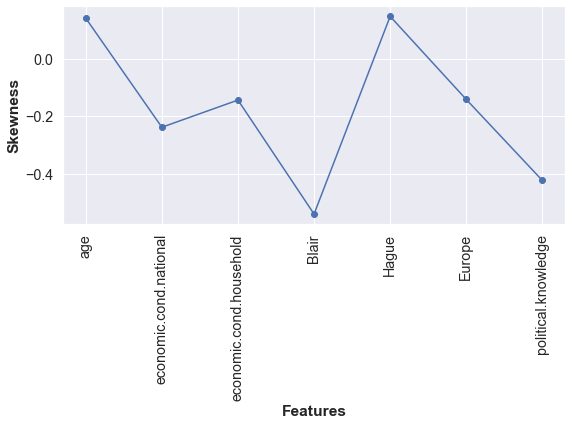

In [17]:
sk=pd.DataFrame(stats.skew(df.drop(['gender','vote'],axis=1)))
sk.index=df.drop(['gender','vote'],axis=1).columns
sns.set(font_scale=1.3)
sk.plot(kind='line',grid=1,figsize=(9,4),rot=90,marker='o',legend=0);
plt.xlabel('Features',weight='bold')
plt.ylabel('Skewness',weight='bold')
plt.show()
sns.set(font_scale=1.0)

In [18]:
sk1=sk.rename(columns = {0:'Skewness'})
round(sk1.T,2)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
Skewness,0.14,-0.24,-0.14,-0.54,0.15,-0.14,-0.42


In [19]:
df.isnull().sum().sum()

0

In [20]:
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [21]:
df.shape

(1517, 9)

C:\Users\Jitu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


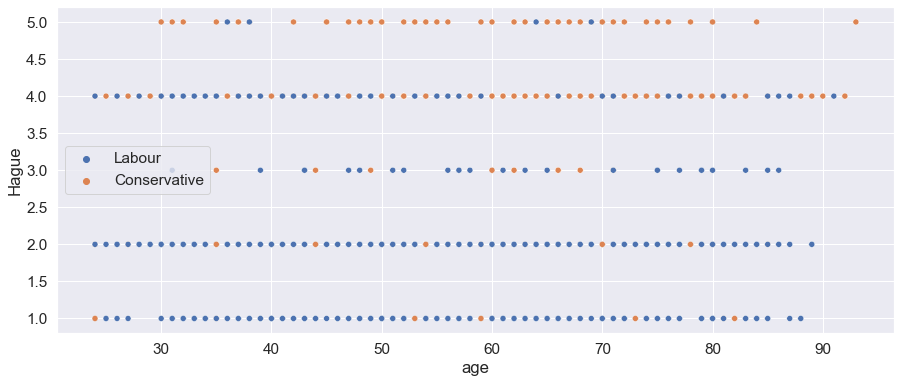

In [33]:
sns.set(font_scale=1.4)
# figure size
plt.figure(figsize = (15,6))

# distribution plot
#plt.subplot(2,3,1) # subplot
sns.scatterplot(df['age'], df['Hague'],hue = df['vote'])
plt.legend()
plt.show()
sns.set(font_scale=1)

C:\Users\Jitu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


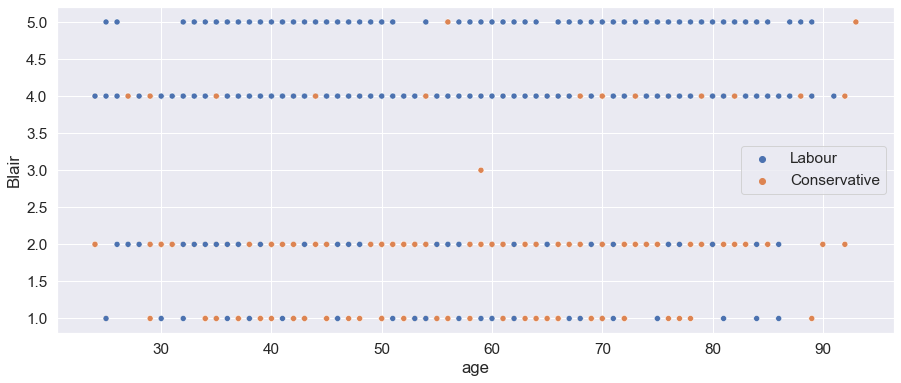

In [35]:
sns.set(font_scale=1.4)
# figure size
plt.figure(figsize = (15,6))

# distribution plot
#plt.subplot(2,3,1) # subplot
sns.scatterplot(df['age'], df['Blair'],hue = df['vote'])
plt.legend()
plt.show()
sns.set(font_scale=1)

C:\Users\Jitu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


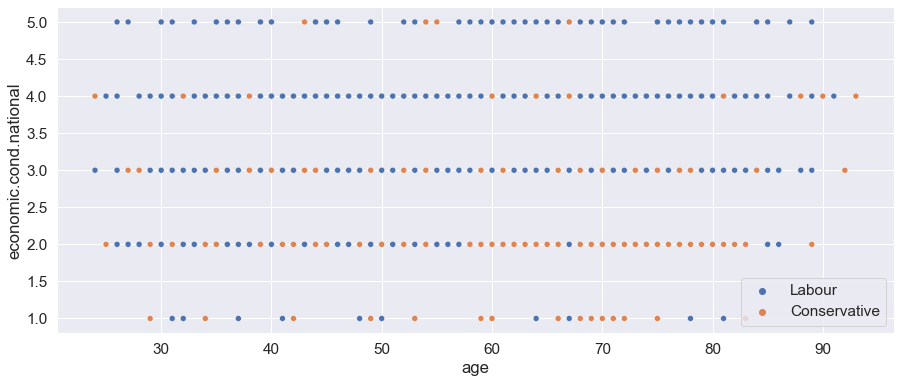

In [31]:
sns.set(font_scale=1.4)
# figure size
plt.figure(figsize = (15,6))

# distribution plot
#plt.subplot(2,3,1) # subplot
sns.scatterplot(df['age'], df['economic.cond.national'],hue = df['vote'])
plt.legend()
plt.show()
sns.set(font_scale=1)

C:\Users\Jitu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


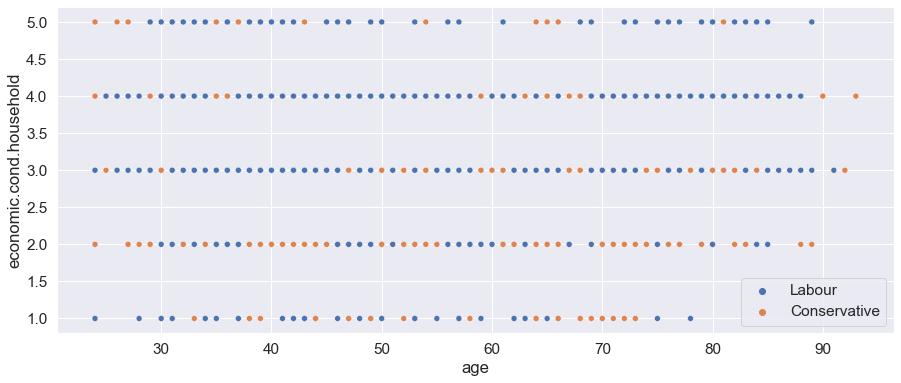

In [32]:
sns.set(font_scale=1.4)
# figure size
plt.figure(figsize = (15,6))

# distribution plot
#plt.subplot(2,3,1) # subplot
sns.scatterplot(df['age'], df['economic.cond.household'],hue = df['vote'])
plt.legend()
plt.show()
sns.set(font_scale=1)

In [63]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("--------------------------------")
    print(df[column].describe(),end=' ')
    
    
    print("\n\nDistribution of " + column)
    print("-------------------------------------")
    sns.displot(df[column], kde=1, color='m',bins=nbins);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("------------------------------")
    ax = sns.boxplot(x=df[column],color='y');
    plt.show()

Description of age
--------------------------------
count    1517.000000
mean       54.241266
std        15.701741
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64 

Distribution of age
-------------------------------------


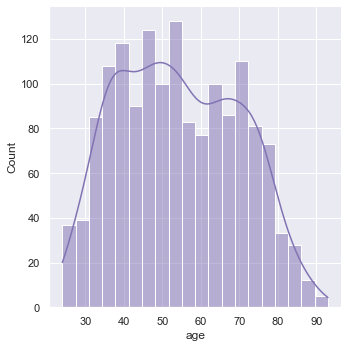

BoxPlot of age
------------------------------


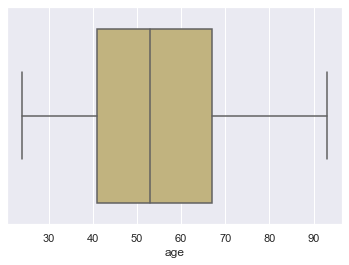

Description of economic.cond.national
--------------------------------
count    1517.000000
mean        3.245221
std         0.881792
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.national, dtype: float64 

Distribution of economic.cond.national
-------------------------------------


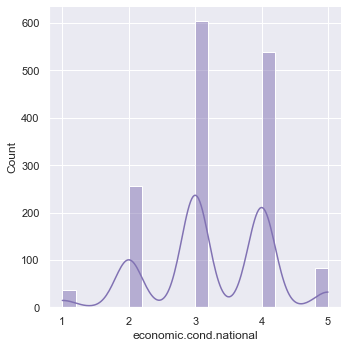

BoxPlot of economic.cond.national
------------------------------


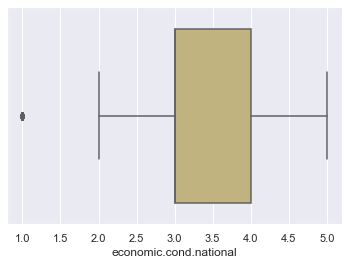

Description of economic.cond.household
--------------------------------
count    1517.000000
mean        3.137772
std         0.931069
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.household, dtype: float64 

Distribution of economic.cond.household
-------------------------------------


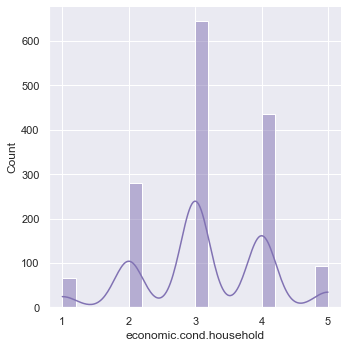

BoxPlot of economic.cond.household
------------------------------


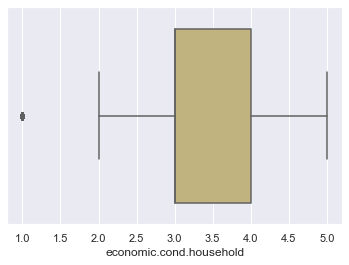

Description of Blair
--------------------------------
count    1517.000000
mean        3.335531
std         1.174772
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Blair, dtype: float64 

Distribution of Blair
-------------------------------------


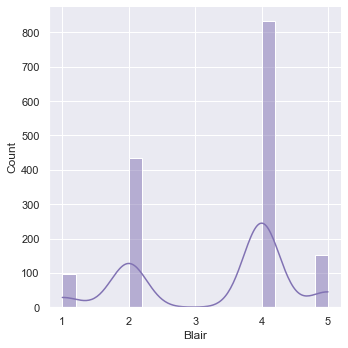

BoxPlot of Blair
------------------------------


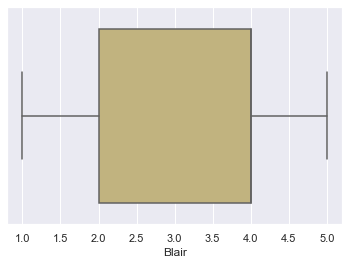

Description of Hague
--------------------------------
count    1517.000000
mean        2.749506
std         1.232479
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Hague, dtype: float64 

Distribution of Hague
-------------------------------------


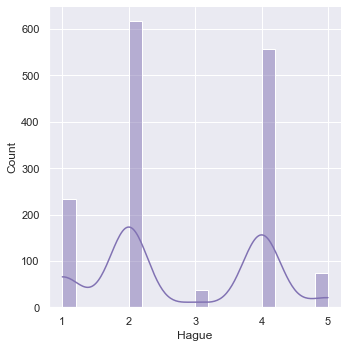

BoxPlot of Hague
------------------------------


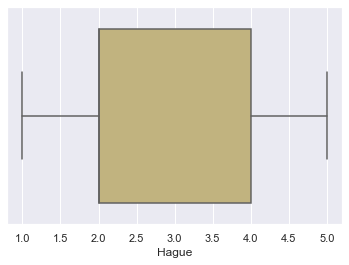

Description of Europe
--------------------------------
count    1517.000000
mean        6.740277
std         3.299043
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        11.000000
Name: Europe, dtype: float64 

Distribution of Europe
-------------------------------------


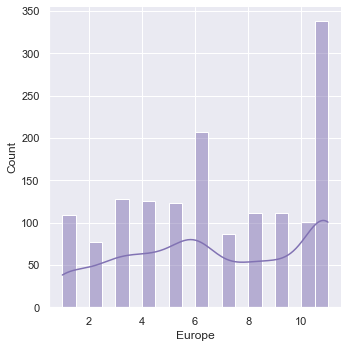

BoxPlot of Europe
------------------------------


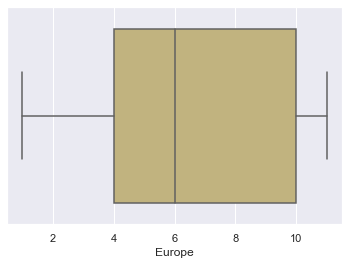

Description of political.knowledge
--------------------------------
count    1517.000000
mean        1.540541
std         1.084417
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: political.knowledge, dtype: float64 

Distribution of political.knowledge
-------------------------------------


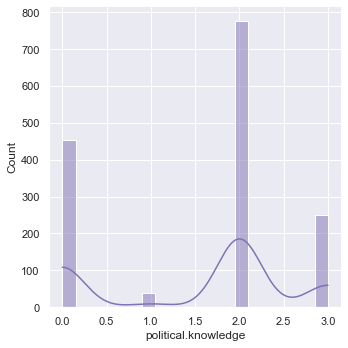

BoxPlot of political.knowledge
------------------------------


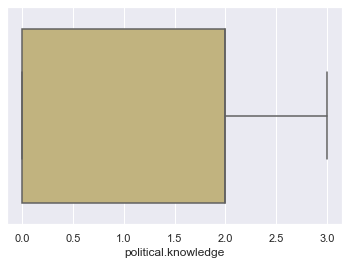

In [64]:
lstcolumns = list(df.select_dtypes(include='int64').columns.values)
for x in lstcolumns:
    univariateAnalysis_numeric(x,20)

In [65]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

<ipython-input-65-f90812c99787>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
<ipython-input-65-f90812c99787>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


Blair                       0
Europe                      0
Hague                       0
age                         0
economic.cond.household    65
economic.cond.national     37
gender                      0
political.knowledge         0
vote                        0
dtype: int64

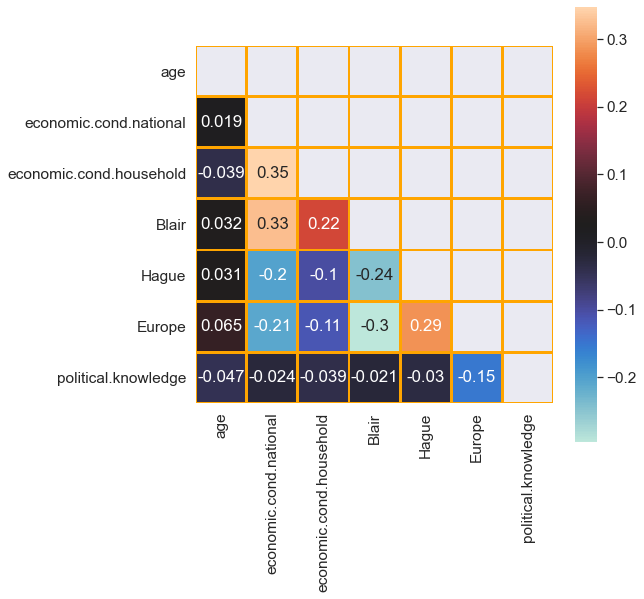

In [66]:
plt.figure(figsize=(8,8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.set(font_scale=1.4)
sns.heatmap(df.corr(),cmap="icefire",annot=True,linewidths=2,
                linecolor='orange',square=True,mask=mask);
sns.set(font_scale=1)

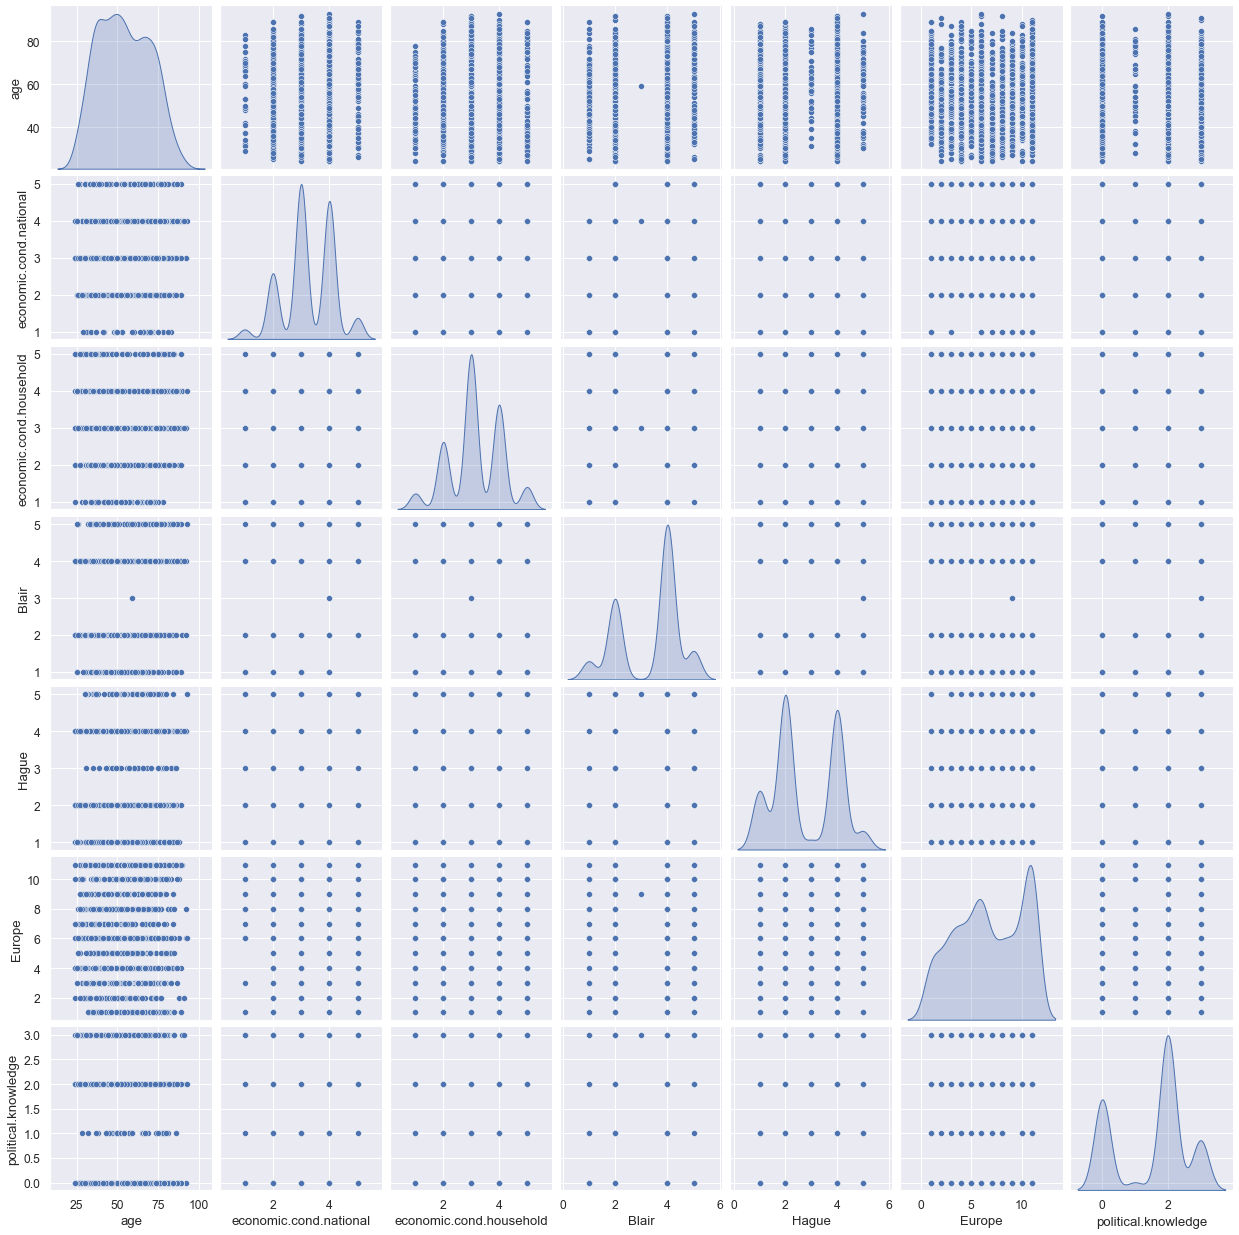

In [67]:
sns.set(font_scale=1.1)
sns.pairplot(df,diag_kind='kde').savefig('out.jpg')
sns.set(font_scale=1)

In [68]:
for column in df.columns: 
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique(),'unique values')
        print('--------------------')
        print(df[column].value_counts())
        print('\n',column.upper(),'(normalized)')
        print('--------------------')
        print(df[column].value_counts(normalize=1))
        print('\n*************************************************\n\n')

VOTE :  2 unique values
--------------------
Labour          1057
Conservative     460
Name: vote, dtype: int64

 VOTE (normalized)
--------------------
Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64

*************************************************


GENDER :  2 unique values
--------------------
female    808
male      709
Name: gender, dtype: int64

 GENDER (normalized)
--------------------
female    0.53263
male      0.46737
Name: gender, dtype: float64

*************************************************




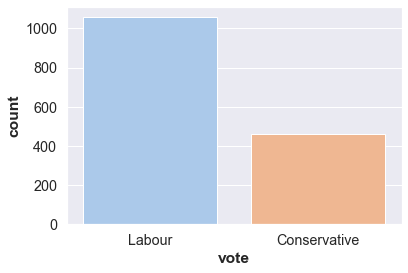

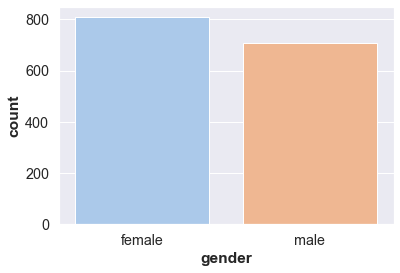

In [69]:
sns.set(font_scale=1.3)
for column in df.columns: 
    if df[column].dtype == 'object':
        sns.countplot(x=column, data=df, palette='pastel')
        plt.ylabel('count',weight="bold")
        plt.xlabel(column,weight="bold")
        plt.show()
sns.set(font_scale=1)

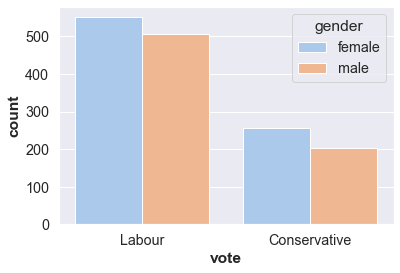

In [70]:
sns.set(font_scale=1.3)
sns.countplot(x='vote', data=df, hue='gender', palette='pastel')
plt.ylabel('count',weight="bold")
plt.xlabel('vote',weight="bold")
plt.show()
sns.set(font_scale=1)

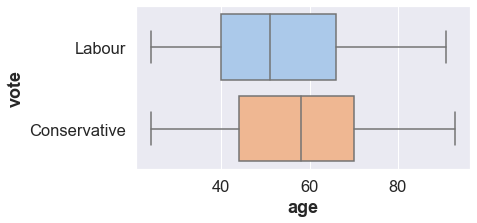

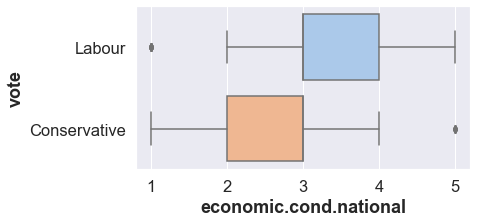

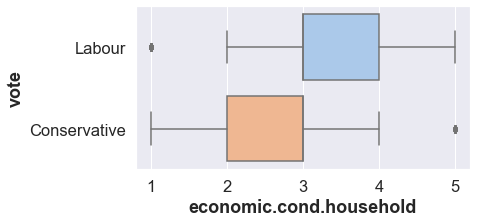

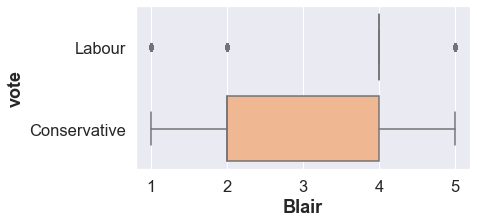

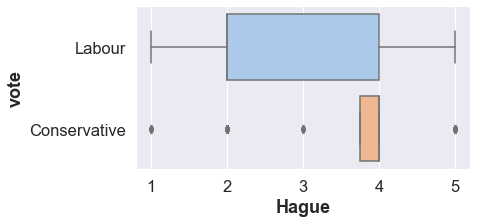

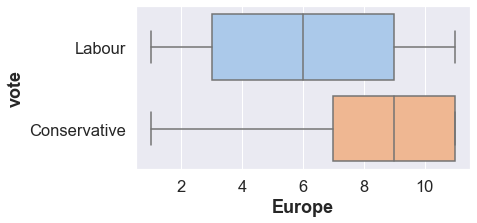

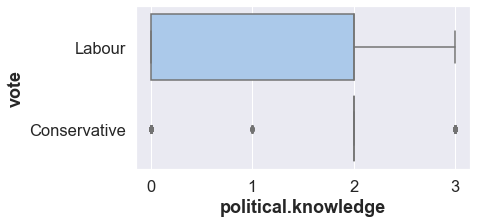

In [71]:
sns.set(font_scale=1.5)
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
lstcolumns = list(df.select_dtypes(include=numerics).columns.values)
for val in lstcolumns:
        plt.figure(figsize=(6,3))
        sns.boxplot(x=val, y='vote', data=df, palette='pastel',orient='h')
        plt.xlabel(val,weight="bold")
        plt.ylabel('vote',weight="bold")
        plt.show()
sns.set(font_scale=1)

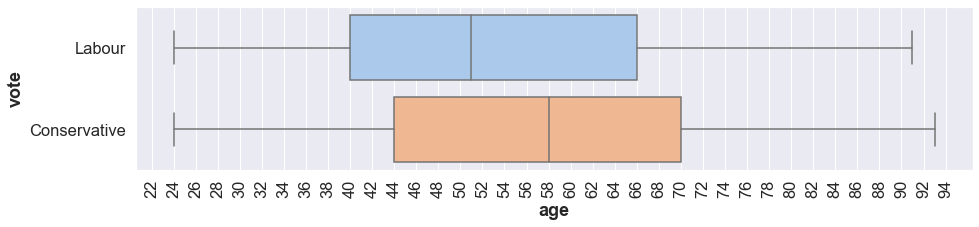

In [72]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15,3))
sns.boxplot(x='age', y='vote', data=df, palette='pastel',orient='h')
plt.xlabel('age',weight="bold")
plt.ylabel('vote',weight="bold")
plt.xticks(range(22,96,2),rotation=90)
plt.show()
sns.set(font_scale=1.0)

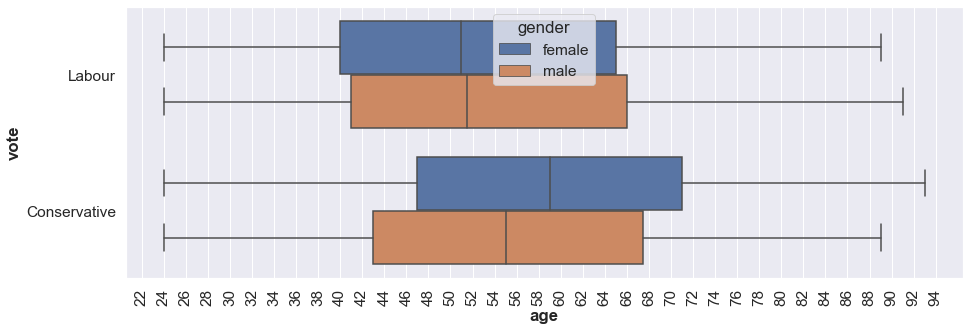

In [73]:
sns.set(font_scale=1.4)
plt.figure(figsize=(15,5))
sns.boxplot(y='vote', x='age', hue='gender',data=df,orient='h',);
plt.xlabel('age',weight="bold")
plt.ylabel('vote',weight="bold")
plt.xticks(range(22,96,2),rotation=90)
sns.set(font_scale=1)

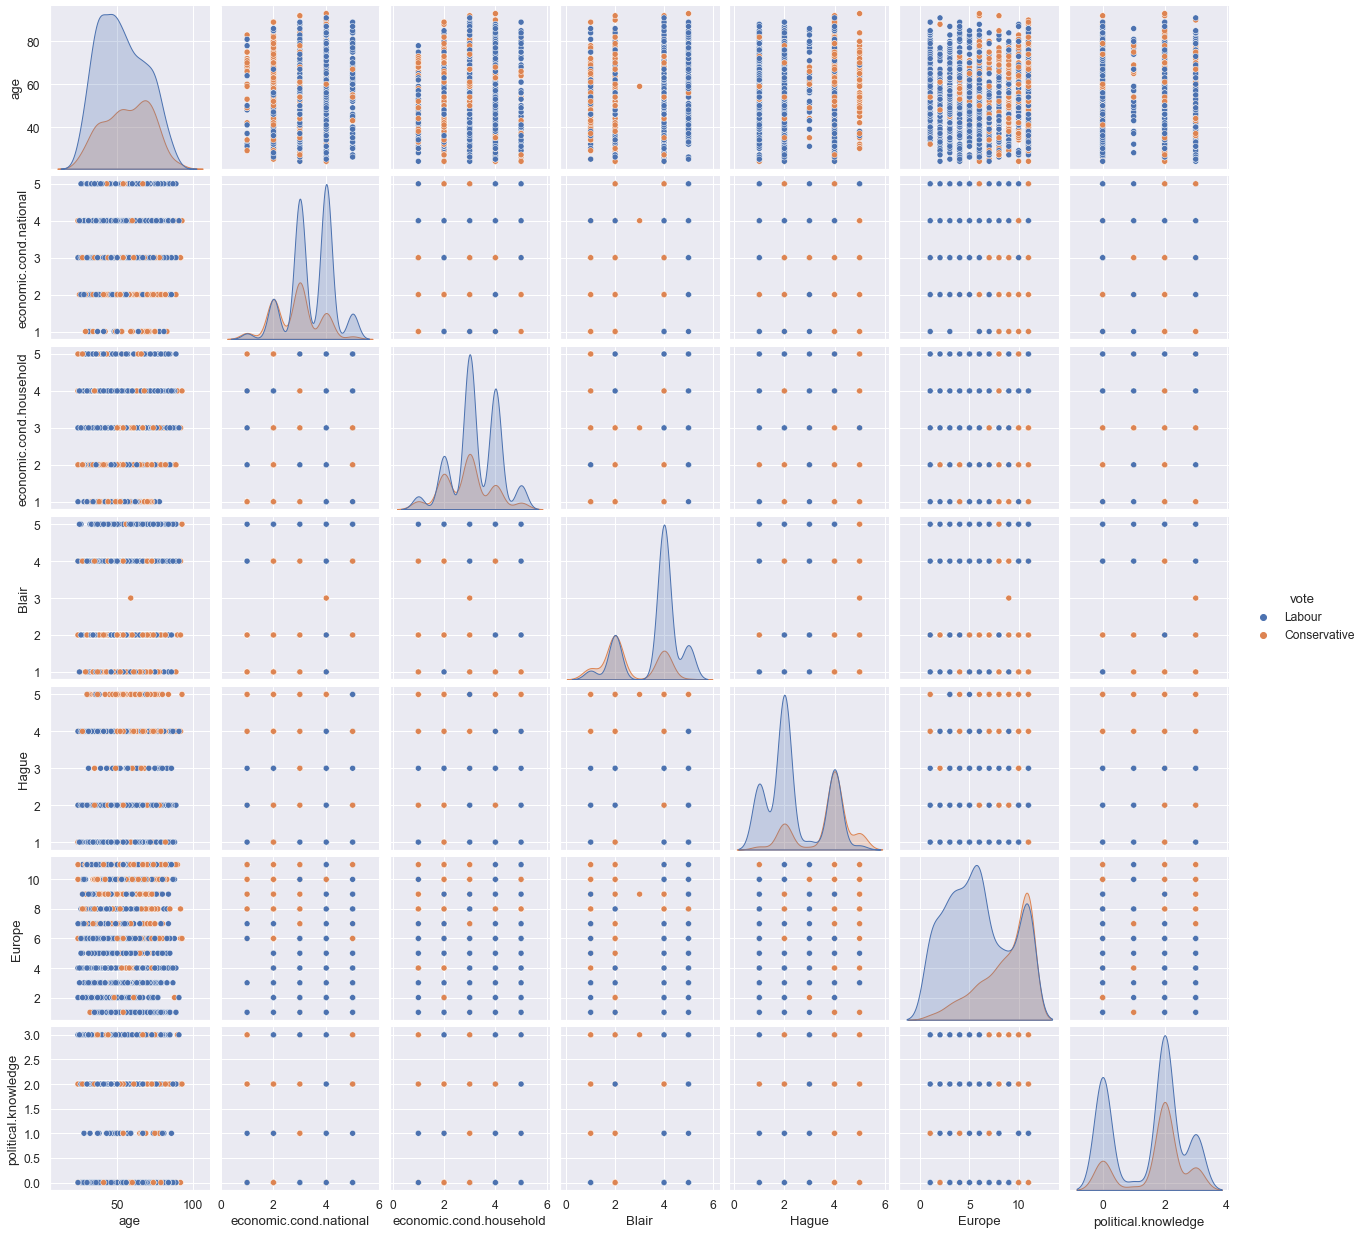

In [74]:
sns.set(font_scale=1.1)
sns.pairplot(df,diag_kind='kde',hue='vote').savefig('out1.jpg')
sns.set(font_scale=1)

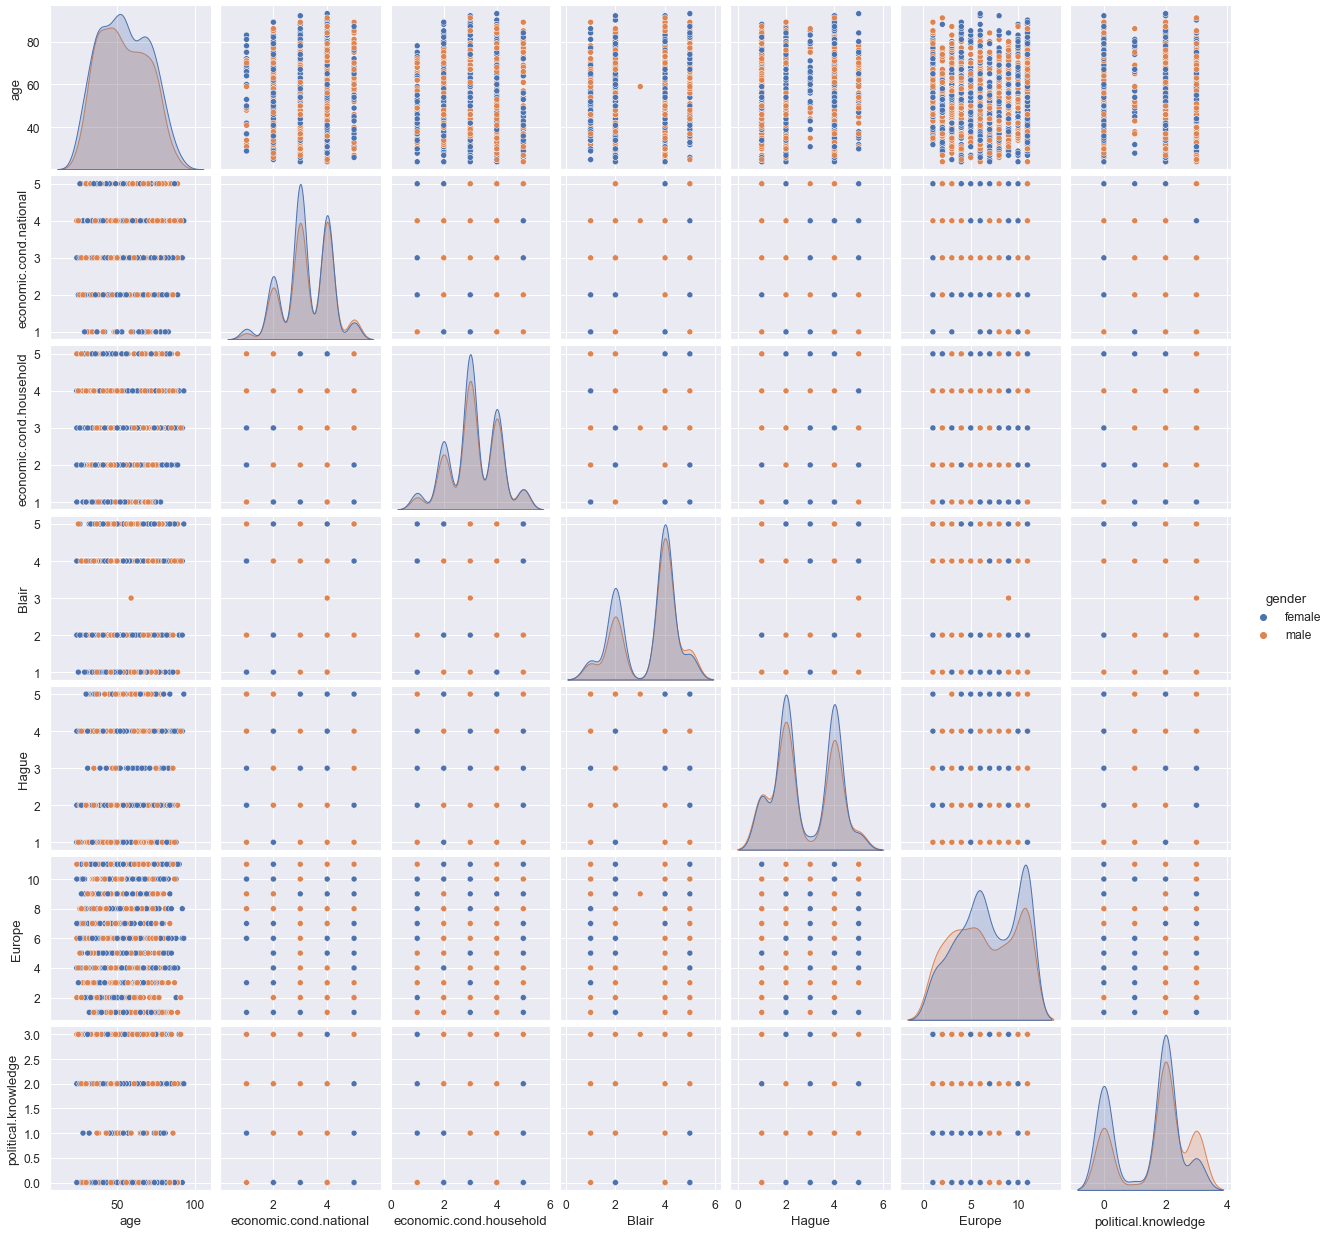

In [75]:
sns.set(font_scale=1.1)
sns.pairplot(df,diag_kind='kde',hue='gender').savefig('out2.jpg')
sns.set(font_scale=1)

In [76]:
df1=df.describe().T
df1['range']=df1['max']-df1['min']
df1['IQR']=df1['75%']-df1['25%']
df1['CV']=df1['std']/df1['mean']
df1['mode']=df.mode().T[0]
#df1['mode2']=df.mode().T[1]
#df1['mode3']=df.mode().T[2]
#df1['mode4']=df.mode().T[3]
round(df1.drop('count',axis=1).rename(columns = {'50%':'median'}),2)

,mean,std,min,25%,median,75%,max,range,IQR,CV,mode
age,54.24,15.70,24.0,41.0,53.0,67.0,93.0,69.0,26.0,0.29,37
economic.cond.national,3.25,0.88,1.0,3.0,3.0,4.0,5.0,4.0,1.0,0.27,3
economic.cond.household,3.14,0.93,1.0,3.0,3.0,4.0,5.0,4.0,1.0,0.30,3
Blair,3.34,1.17,1.0,2.0,4.0,4.0,5.0,4.0,2.0,0.35,4
Hague,2.75,1.23,1.0,2.0,2.0,4.0,5.0,4.0,2.0,0.45,2
Europe,6.74,3.30,1.0,4.0,6.0,10.0,11.0,10.0,6.0,0.49,11
political.knowledge,1.54,1.08,0.0,0.0,2.0,2.0,3.0,3.0,2.0,0.70,2


In [90]:
df =pd.get_dummies(df, columns=['gender'],drop_first=True)

In [91]:
df

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,Labour,43,3,3,4,1,2,2,0
1,Labour,36,4,4,4,4,5,2,1
2,Labour,35,4,4,5,2,3,2,1
3,Labour,24,4,2,2,1,4,0,0
4,Labour,41,2,2,1,1,6,2,1
...,...,...,...,...,...,...,...,...,...
1512,Conservative,67,5,3,2,4,11,3,1
1513,Conservative,73,2,2,4,4,8,2,1
1514,Labour,37,3,3,5,4,2,2,1
1515,Conservative,61,3,3,1,4,11,2,1


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender_male              1517 non-null   uint8 
dtypes: int64(7), object(1), uint8(1)
memory usage: 96.4+ KB
